<a href="https://colab.research.google.com/github/nicorunini/CCMACLRL_EXERCISES_COM232/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

Simple Linear Regression

**Instructions:**

Build a Simple Linear Regression model to study the linear relationship between the years of experience and salary.

<img src="https://media2.giphy.com/media/67ThRZlYBvibtdF9JH/200w.gif?cid=6c09b952x78udp8ynvf71q2iximtwq0egwludug1qo7qgla2&ep=v1_gifs_search&rid=200w.gif&ct=g">


1. Import the necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

2. Load the salary.csv file

In [3]:
df = pd.read_csv("salary.csv")

3. Print the first 5 rows of the dataset

In [4]:
df.head()

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


4. Display the general information of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


5. Visualize the data by creating a scatter plot

<Axes: xlabel='YearsExperience', ylabel='Salary'>

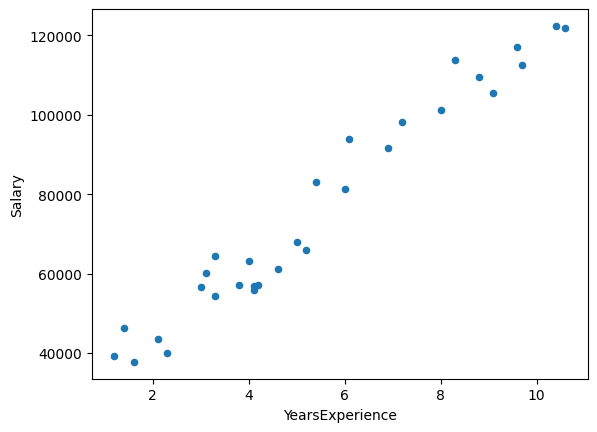

In [7]:
df.plot(x='YearsExperience',y='Salary',kind='scatter')

6. Split the dataset into a training set and test set

In [20]:
X = df['YearsExperience'].values
y = df['Salary'].values
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20, 1)
(10, 1)
(10, 1)


7. Create an new instance of a linear regression model

In [22]:
# Create an instance the linear regression class
lr_model = LinearRegression()


8. Train and test the model using the training set and test set

In [23]:
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

9. Print the equation of the line

- Display the slope
- Display the intercept
- Display the equation of the line

In [24]:
# Slope
m = lr_model.coef_[0]
m = m[0]

# Intercept
b = lr_model.intercept_[0]

print("b = ", b)
print("m = ", m)
print("y = ", m, "* x + ", b)

b =  24382.731502336872
m =  9426.038769074832
y =  9426.038769074832 * x +  24382.731502336872


10. Draw the Regression Line

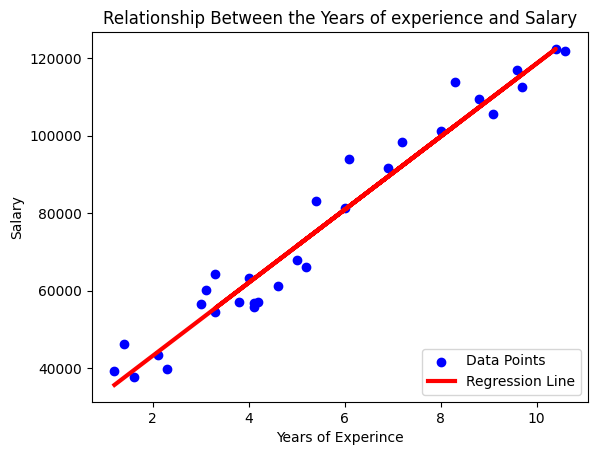

In [25]:
plt.scatter(X, y, color = 'blue', label='Data Points')
plt.plot(X_test, y_pred, color = 'red', linewidth=3, label = 'Regression Line')
plt.title('Relationship Between the Years of experience and Salary')
plt.xlabel('Years of Experince')
plt.ylabel('Salary')
plt.legend(loc=4)
plt.show()

11. Compute the Sum of Square Error (SSE)

In [31]:
y_test = y_test.reshape(-1)

# Reshape y_pred from a two dimensional array back to a one dimensional array
y_pred = y_pred.reshape(-1)

df1 = pd.DataFrame({'Actual_Salary': y_test, 'Predicted_Salary':y_pred})

In [32]:
df1.head()

,Actual_Salary,Predicted_Salary
0,112636,115815.307562
1,67939,71512.925348
2,113813,102618.853286
3,83089,75283.340855
4,64446,55488.659440


In [34]:
sum_of_squared_errors = str(np.sum(np.square(df1['Actual_Salary'] - df1['Predicted_Salary'])))

print('residual sum of squares is : ', sum_of_squared_errors)

residual sum of squares is :  353018988.87134814


In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.955306313804495
